<a href="https://colab.research.google.com/github/Paulorgcastro/git-basics/blob/master/Final_Project_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pathlib
import os #handle files
import glob as gb
import PIL

from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras

In [ ]:


#dataset_url = "https://www.kaggle.com/puneet6060/intel-image-classification/download"
#data_dir = tf.keras.utils.get_file('image', origin=dataset_url, untar=True)

#import os
#from google.colab import drive
#drive.mount('/gdrive')
#   /content/drive/MyDrive/Colab Notebooks/data/seg_test
#data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/data/')

#!unzip '/gdrive/My Drive/Kaggle Projects/Histopathologic_Cancer_Detection/histopathologic-cancer-detection.zip' -d '/gdrive/My Drive/Kaggle Projects/Histopathologic_Cancer_Detection/'

In [ ]:
#!unzip '/content/archive.zip' -d '/content/'

In [ ]:
#total_files =0
#loop the parent director
#for root, dirs, files in os.walk(str(data_dir)):
#    level = root.replace(str(data_dir), '').count(os.sep)
#    indent = ' ' * 4 * (level)
#    print(f'{indent}{os.path.basename(root)}/ ({len(files)} files)')
#    total_files += len(files)
#print(f'There are {total_files -1} images in this dataset')

In [ ]:
#data_dir

In [ ]:
#train_ds = "/content/drive/MyDrive/Colab Notebooks/data/seg_train/"
#test_ds = "/content/drive/MyDrive/Colab Notebooks/data/seg_test/"
#pred_ds = "/content/drive/MyDrive/Colab Notebooks/data/seg_pred/"

In [ ]:
train_ds = "/content/seg_train/seg_train/"
test_ds = "/content/seg_test/seg_test/"

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_ds,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8288 files belonging to 4 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_ds,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 6 classes.


In [ ]:
# Q2. Build a baseline CNN model on the training dataset and evaluate it on the test dataset.
num_classes = 6

model = Sequential([
          layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
          layers.Conv2D(16, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(16, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Flatten(),
          layers.Dense(32, activation='relu'),
          layers.Dense(num_classes, activation='softmax')
        ])

In [ ]:
opt = tf.keras.optimizers.Adam(lr = 0.0001, epsilon = 1e-08)
model.compile(optimizer= opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32400)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1

In [ ]:
epochs=10
history = model.fit(train_ds, validation_data=test_ds, epochs=epochs, batch_size=32, verbose=1)

Epoch 1/10
259/259 [==============================] - 195s 744ms/step - loss: 0.9752 - accuracy: 0.6036 - val_loss: 3.4051 - val_accuracy: 0.4900
Epoch 2/10
259/259 [==============================] - 187s 720ms/step - loss: 0.6136 - accuracy: 0.7792 - val_loss: 3.6322 - val_accuracy: 0.5030
Epoch 3/10
259/259 [==============================] - 187s 723ms/step - loss: 0.5558 - accuracy: 0.8035 - val_loss: 3.7057 - val_accuracy: 0.5233
Epoch 4/10
259/259 [==============================] - 187s 722ms/step - loss: 0.5022 - accuracy: 0.8181 - val_loss: 3.9171 - val_accuracy: 0.5160
Epoch 5/10
259/259 [==============================] - 187s 723ms/step - loss: 0.4555 - accuracy: 0.8452 - val_loss: 3.9904 - val_accuracy: 0.5230
Epoch 6/10
259/259 [==============================] - 187s 722ms/step - loss: 0.4169 - accuracy: 0.8579 - val_loss: 4.1658 - val_accuracy: 0.5377
Epoch 7/10
156/259 [=================>............] - ETA: 1:05 - loss: 0.3956 - accuracy: 0.8624

In [ ]:
loss0, accuracy0 = model.evaluate(test_ds)

In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Q3. Build a second CNN model with data augmentation and dropout and evaluate it on the test dataset.
# Data Augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
plt.figure(figsize=(10, 10))
#discard label using _ since we don't use it anymore in this code
for images, _ in train_ds.take(1): #take out one batch =32 images
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    #we only plot the first of the 32 images for illustration purposes
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
num_classes = 6

model = Sequential([
              data_augmentation,
              layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
              layers.Conv2D(16, 3, padding='same', activation='relu'),
              layers.MaxPooling2D(),
              layers.Conv2D(16, 3, padding='same', activation='relu'),
              layers.MaxPooling2D(),
              layers.Dropout(0.25),
              layers.Flatten(),
              layers.Dense(32, activation='relu'),
              layers.Dense(num_classes, activation='softmax')
        ])

In [ ]:
opt = tf.keras.optimizers.Adam(lr = 0.0001, epsilon = 1e-08)
model.compile(optimizer= opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history2 = model.fit(train_ds, validation_data=test_ds, epochs=epochs, batch_size=128, verbose=1)

Epoch 1/10
259/259 [==============================] - 227s 873ms/step - loss: 1.0299 - accuracy: 0.5935 - val_loss: 3.3163 - val_accuracy: 0.4553
Epoch 2/10
259/259 [==============================] - 228s 881ms/step - loss: 0.6364 - accuracy: 0.7619 - val_loss: 3.6566 - val_accuracy: 0.4590
Epoch 3/10
259/259 [==============================] - 229s 884ms/step - loss: 0.5976 - accuracy: 0.7733 - val_loss: 3.7109 - val_accuracy: 0.4867
Epoch 4/10
259/259 [==============================] - 228s 881ms/step - loss: 0.5663 - accuracy: 0.7880 - val_loss: 3.9973 - val_accuracy: 0.4600
Epoch 5/10
259/259 [==============================] - 229s 883ms/step - loss: 0.5610 - accuracy: 0.7877 - val_loss: 3.8411 - val_accuracy: 0.4943
Epoch 6/10
259/259 [==============================] - 229s 884ms/step - loss: 0.5259 - accuracy: 0.8079 - val_loss: 4.1122 - val_accuracy: 0.4603
Epoch 7/10
259/259 [==============================] - 228s 879ms/step - loss: 0.5287 - accuracy: 0.8075 - val_loss: 4.0690 -

In [ ]:
loss0, accuracy0 = model.evaluate(test_ds)

94/94 [==============================] - 23s 247ms/step - loss: 4.3254 - accuracy: 0.5047


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 4.33
initial accuracy: 0.50


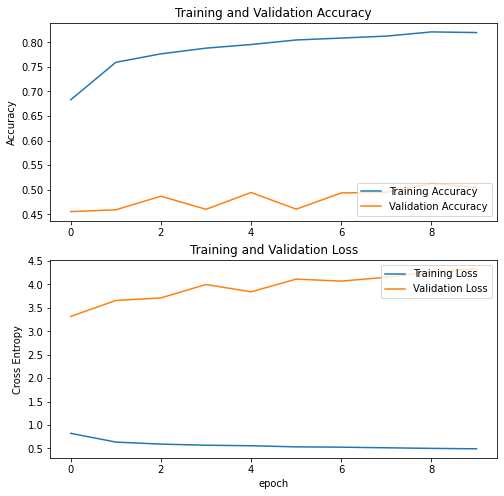

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Q4. Build a third CNN model based on the pre-trained model(transfer learning) and evaluate it on the test dataset
AUTOTUNE=tf.data.experimental.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input 

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
#IMG_SIZE = (180, 180)
IMG_SHAPE = (img_height, img_width) + (3, )
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SHAPE),#specify input size
                                               include_top=False,
                                               weights='imagenet') #pre-training on ImageNet

In [ ]:
#take out one batch of size of 32 images
image_batch, label_batch = next(iter(train_ds))

feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 6, 6, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 90, 90, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 90, 90, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 90, 90, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(units=6, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 6)


In [ ]:
#2nd appracoh to build a model using keras funcitonal API
#specify the inputs
inputs = tf.keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 180, 180, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 180, 180, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0     

In [ ]:
len(model.trainable_variables)

2

In [ ]:
loss0, accuracy0 = model.evaluate(test_ds)

94/94 [==============================] - 78s 808ms/step - loss: 1.9302 - accuracy: 0.2251


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.95
initial accuracy: 0.22


In [ ]:
initial_epochs = 10
history3 = model.fit(train_ds, epochs=initial_epochs, validation_data=test_ds)

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss0, accuracy0 = model.evaluate(test_ds)
print("End loss: {:.2f}".format(loss0))
print("End accuracy: {:.2f}".format(accuracy0))